In [52]:
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

sns.set_theme(style="whitegrid")
color = sns.color_palette("Set2", 10)
sns.set_palette(palette = color)

# get data

## corticalFlow, v2c, cortexODE

In [53]:
pre = '../../data/MeshCollisionData/mesh-intersection/'
pre2 = '../../data/MeshCollisionData/self-Intersection/'

In [54]:
lists = os.listdir(pre)
lists

['cf-pw-intersections.csv',
 'v2c-pw-intersections.csv',
 'whitePialIntesectionsGTruth-points.csv',
 'code-pw-intersections.csv',
 'deepcsrWtPlCollision.csv',
 'dcsr-pw-intersections.csv']

In [55]:
def get_data(idx, pre = pre):
    df = pd.read_csv(pre + lists[idx])
    df['ratio'] = df['intersections']/(df['pial-traingles']+df['white-traingles']) * 100
    return list(df['ratio'])

cf_data = get_data(0)
v2c_data = get_data(1)
code = get_data(3)

## GT(FreeSurfer)

In [56]:
df = pd.read_csv(pre + lists[2])
df

,idx,f1,intersections,points
0,0,/data/users2/llu13/output/cortexode/truth/samp...,4933,133471
1,1,/data/users2/llu13/output/cortexode/truth/samp...,4519,144630
2,2,/data/users2/llu13/output/cortexode/truth/samp...,5460,171923
3,3,/data/users2/llu13/output/cortexode/truth/samp...,5105,139966
4,4,/data/users2/llu13/output/cortexode/truth/samp...,5182,140196
...,...,...,...,...
102,102,/data/users2/llu13/output/cortexode/truth/samp...,5013,133909
103,103,/data/users2/llu13/output/cortexode/truth/samp...,4847,117257
104,104,/data/users2/llu13/output/cortexode/truth/samp...,4771,158470
105,105,/data/users2/llu13/output/cortexode/truth/samp...,4988,145872


In [57]:
df['f1_update'] = df['f1'].apply(lambda x:x.split('/')[-1])

In [58]:

f1 = pre2 + 'SelfIntersectionGTruthOutputs-lh-white.csv'
f2 = pre2 + 'SelfIntersectionGTruthOutputs-LH-PIAL.csv'
df1, df2 = pd.read_csv(f1),pd.read_csv(f2)

df['ratio'] = df['intersections']/(df1['triangles']*2)*100

In [59]:
fsurfer = list(df['ratio'])

## deepCSR

In [60]:
df = pd.read_csv(pre + lists[4],header=None)
df2 = pd.read_csv(pre + lists[5])

def fun1(idx):
    tmp = df2[df2['idx']==0]
    return tmp['pial-traingles'][0] + tmp['white-traingles'][0]

df['ratio'] = df[2]/fun1(df[0])*100

In [61]:
dcsr = list(df['ratio'])

## sorting 

    Sorting high -> low: 
    
        code, v2c, fsurfer, cf, dcsr

## re-organize the data for all the models.

In [62]:
models = ['CortexODE','Vox2Cortex','FreeSurfer','CorticalFlow','DeepCSR']
model = [models[0]]*len(code) + [models[1]] * len(v2c_data) + [models[2]] * len(fsurfer) + [models[3]] * len(cf_data) + [models[4]] * len(dcsr)
nums = code + v2c_data + fsurfer + cf_data + dcsr

nums = [d*2.0 for d in nums]

In [63]:
df2 = pd.DataFrame()
df2['Model'] = model

In [64]:
df2['White pial collision percentage'] = nums

# plot

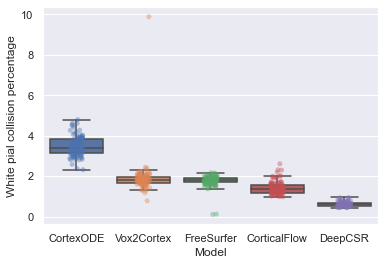

In [65]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

x='Model' 
y='White pial collision percentage'

# Usual boxplot
ax = sns.boxplot(x=x, y=y, data=df2,showfliers=False)
 
ax = sns.stripplot(x=x, y=y, data=df2,jitter=True,alpha = .4);

# Save Figure

## save as PNG

In [66]:
fig = ax.get_figure()
fig.savefig('WhitePialCollisionPlot.png', bbox_inches='tight',dpi=300)

## save as SVG

In [67]:
fig.savefig('WhitePialCollisionPlot.svg', transparent=True, bbox_inches='tight', pad_inches=0)